In [1]:
import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
model = Model(seed = 60, num_fits = 1)

In [3]:
model.fetch_dataset("https://raw.githubusercontent.com/lishaparmar13/H5P-Enhanced-BKT/main/Above16-SS.csv",'.')

In [4]:
df3= pd.read_csv(r"Above16-SS.csv", encoding ='latin')
df3.tail(5)

,Row,Anon Student Id,Age,Problem Hierarchy,question_id,Step Start Time,Step End Time,Correct First Attempt,Step Duration (sec),Answer Type,KC(Default),skill_id,Opportunity (Default),template_id
109,7,7,16+,2,9,15-07-2023 15:42,15-07-2023 15:42,1,3,Single Choice set,Ratio and Proportion,6,1,6
110,9,9,16+,2,9,15-07-2023 17:46,15-07-2023 17:47,1,38,Single Choice set,Ratio and Proportion,6,1,6
111,10,10,16+,2,9,15-07-2023 21:25,15-07-2023 21:25,1,16,Single Choice set,Ratio and Proportion,6,1,6
112,14,14,16+,2,9,17-07-2023 22:29,17-07-2023 22:29,0,13,Single Choice set,Ratio and Proportion,6,1,6
113,25,25,16+,2,9,23-07-2023 12:35,23-07-2023 12:36,1,60,Single Choice set,Ratio and Proportion,6,1,6


In [5]:
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)

In [6]:
model.fit(data_path = 'Above16-SS.csv')
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\multiprocessing\util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\multiprocessing\pool.py", line 713, in _terminate_pool
    p.terminate()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\multiprocessing\process.py", line 133, in terminate
    self._popen.terminate()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\multiprocessing\popen_spawn_win32.py", line 123, in terminate
    _winapi.TerminateProcess(int(self._handle), TERMINATE)
PermissionError: [WinError 5] Access is denied


Fitted Skills:
Algebra
Ratio and Proportion
Numbers
Geometry
Fractions
Percentages


In [7]:
# Evaluate with the default RMSE then specify AUC.
model.fit(data = df3)
training_rmse = model.evaluate(data = df3)
training_auc = model.evaluate(data = df3, metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.494959
Training AUC: 0.556050


In [8]:
#define own metric
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data = df3, metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.445616


In [9]:
model = Model(seed = 60, num_fits = 1)
model.fit(data= train_df)
preds = model.predict(data= test_df)
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(10)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
36,6,Geometry,1,0.50114,0.72729
72,6,Algebra,1,0.35700,0.48266
0,6,Algebra,0,0.48633,0.92349
18,6,Numbers,0,0.62931,0.83859
66,6,Fractions,0,0.46846,0.07893
12,6,Geometry,0,0.49989,0.79825
103,7,Percentages,1,0.66661,0.66661
91,7,Numbers,1,0.62931,0.83859
80,9,Fractions,0,0.46846,0.07893
26,9,Percentages,1,0.66661,0.66661


In [10]:
# Let's sanity check that we have only trained on the skills that we 
# specified in the call to fit! Note that while it is possible for a 
# BKT prediction to be 0.5 exactly, it is unlikely.
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Geometry', 'Algebra', 'Numbers', 'Fractions', 'Percentages',
       'Ratio and Proportion'], dtype=object)

In [11]:
# We use model.evaluate to accomplish the same thing!
# You should receive an RMSE that is identical to the above
# manually calculated RMSE.
model.evaluate(data = df3)

0.49706756929907514

In [12]:
model.evaluate(data=df3, metric=['rmse','accuracy','auc','mean_absolute_error'])

[0.4890480484045928,
 0.6052631578947368,
 0.6187678628135916,
 0.44698294311490633]

In [13]:
model = Model(seed = 60, num_fits = 1)
# Try this with a different skill or metric by replacing the lines below.
skill = 'Algebra'
metric = 'rmse'

simple_cv = model.crossvalidate(data = df3, skills = skill, 
                                metric = metric)
simple_cv

,rmse
skill,
Algebra,0.51159


In [14]:
model = Model(seed = 60, num_fits = 1)
multigs_cv = model.crossvalidate(data= df3, skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,rmse
skill,
Algebra,0.58116


In [15]:
model = Model(seed = 60, num_fits = 1)
skill = 'Algebra'

multilearn_cv = model.crossvalidate(data= df3, skills = skill,
                                    multilearn ="question_id", metric = metric)
multilearn_cv

,rmse
skill,
Algebra,0.54072


In [16]:
model = Model(seed = 60, num_fits = 1)
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data= df3, skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)

model = Model(seed = 60, num_fits = 1)
multipair_cv = model.crossvalidate(data= df3, skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

,rmse
skill,
Algebra,0.50517
Algebra,0.53590


In [17]:
model = Model(seed = 60, num_fits = 1)
# We combine the fifth parameter, forgets, with the previous multilearn
# and multiguess/slip models for a combo model.
combo_cv = model.crossvalidate(data= df3, skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

,rmse
skill,
Algebra,0.46652


In [18]:
model = Model(seed = 60, num_fits = 1)

In [19]:
skill = 'Geometry'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Geometry': {'prior': 1e-40}}

In [20]:
# Train the model with the pre-initialized parameters.
model.fit(data= df3, multigs = True)
low_prior_auc = model.evaluate(data= df3, metric = 'auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names. 
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.735630


In [21]:
# Initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data= df3, multigs = True)
normal_prior_auc = model.evaluate(data= df3, metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.374901
Training AUC: 0.744046


In [22]:
model.fit(data= df3, skills=skill,
          forgets = True, multilearn = True, 
          multigs = True)
params= model.params()
params

value
skill    param   class          
Geometry prior   default 0.83380
         learns  1       0.00000
                 2       1.00000
                 6       0.66666
         guesses 1       0.00001
                 2       0.00001
                 6       0.00000
         slips   1       0.00000
                 2       0.00070
                 6       0.00000
         forgets 1       1.00000
                 2       0.66605
                 6       1.00000

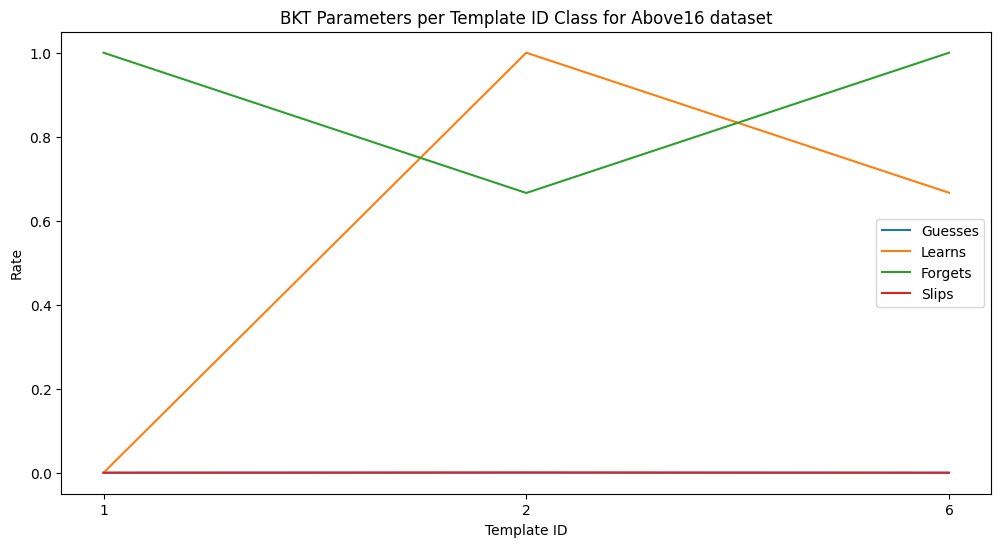

In [23]:
# We will get warnings for using indexing past lexsort. That's fine,
# and we will disable these warnings.
import warnings
warnings.simplefilter(action='ignore')

#Model Intialization
#model = Model(seed = 60, num_fits = 1)
#model.fit(data = df3,
#          forgets = True, multilearn = True, 
#          multigs = True)

# Plot the learns, forgets, slips and guesses for each of the classes.
#params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class for Above16 dataset')
plt.legend();

In [24]:
import pandas as pd

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 1)


In [25]:
model.fit(data= df3,
          forgets = True, multilearn = True, 
          multigs = True)
params= model.params()
params

value
skill                param   class          
Algebra              prior   default 0.99947
                     learns  1       0.00000
                             3       0.00000
                             5       1.00000
                             6       0.00000
                     guesses 1       0.00000
                             3       0.00000
                             5       0.00000
                             6       1.00000
                     slips   1       0.83324
                             3       0.00025
                             5       0.00000
                             6       0.54278
                     forgets 1       0.49960
                             3       0.15796
                             5       0.00004
                             6       1.00000
Geometry             prior   default 0.20194
                     learns  1       0.46751
                             2       1.00000
                             6       1.00000
                     guesses 1       0.06569
                             2       0.45148
                             6       0.00000
                     slips   1       0.00000
                             2       0.00000
                             6       0.00060
                     forgets 1       0.99948
                             2       0.00000
                             6       0.00000
Ratio and Proportion prior   default 0.49990
                     learns  4       1.00000
                             6       0.00000
                     guesses 4       0.99966
                             6       0.00000
                     slips   4       0.99987
                             6       0.00000
                     forgets 4       0.00000
                             6       0.00000
Numbers              prior   default 0.83311
                     learns  1       0.99964
                             2       0.00000
                             6       1.00000
                     guesses 1       0.66676
                             2       0.49994
                             6       0.00000
                     slips   1       0.33343
                             2       0.00000
                             6       0.00000
                     forgets 1       1.00000
                             2       0.00073
                             6       0.99994
Percentages          prior   default 0.66620
                     learns  1       1.00000
                             6       0.00000
                     guesses 1       0.00141
                             6       0.00000
                     slips   1       0.00000
                             6       0.00000
                     forgets 1       0.00000
                             6       0.00000
Fractions            prior   default 0.83328
                     learns  1       0.00000
                             2       1.00000
                             5       0.00000
                             6       0.00000
                     guesses 1       0.33334
                             2       1.00000
                             5       0.99969
                             6       0.00002
                     slips   1       0.00000
                             2       1.00000
                             5       1.00000
                             6       0.00000
                     forgets 1       0.00000
                             2       1.00000
                             5       1.00000
                             6       0.33355